# Exercise 3

저자는 “첫째 아이가 좀더 늦게 태어날 것 같은가?” 라는 질문으로 시작했다. 이 질문을 다루는데, 아이 집단간에 평균에 차이를 계산했다. 하지만, 동일 여성에 대해 첫째 아이와 다른 아이 사이에 차이가 있을 수 있다는 가능성을 간과했다.
이 질문을 다루는데, 적어도 아이가 두명인 응답자를 선택하고 쌍별 차이(pairwise difference)를 계산한다. 이 질문 구성이 다른 결과를 도출해 내는가?

힌트: nsfg.MakePregMap을 사용한다.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd

In [2]:
import first
import nsfg

live, _, _ = first.MakeFrames()
live = live[live.prglngth >= 37]
preg_map = nsfg.MakePregMap(live)
preg_map

defaultdict(list,
            {1: [0, 1],
             2: [2, 3, 4],
             8195: [8952],
             8196: [8953],
             8197: [8956],
             6: [5, 6, 7],
             7: [8],
             8200: [8958],
             2732: [3085, 3086, 3089, 3090, 3091],
             8202: [8959],
             12: [10],
             8194: [8950],
             14: [11, 12],
             2733: [3092, 3093],
             8208: [8960],
             8209: [8961],
             18: [17],
             21: [19, 20],
             23: [21],
             24: [23, 24, 25],
             4100: [4597],
             8219: [8965, 8966],
             28: [26],
             31: [27, 28, 29],
             8224: [8974, 8975],
             36: [31],
             8229: [8980],
             38: [32, 33, 34],
             39: [35],
             8233: [8985, 8986],
             44: [39],
             46: [43],
             8239: [8993],
             49: [44, 47],
             51: [48, 49],
             8248:

In [3]:
data = np.concatenate([live.loc[indices[1:]].prglngth - live.loc[indices[0]].prglngth for indices in preg_map.values() if len(indices) > 1])
pmf = pd.Series(data).value_counts().sort_index()
pmf /= pmf.sum()
pmf

-6.0     0.001533
-5.0     0.006897
-4.0     0.015581
-3.0     0.028608
-2.0     0.084036
-1.0     0.078672
 0.0     0.652107
 1.0     0.059770
 2.0     0.048787
 3.0     0.012261
 4.0     0.007663
 5.0     0.002299
 6.0     0.000766
 7.0     0.000511
 10.0    0.000255
 12.0    0.000255
dtype: float64

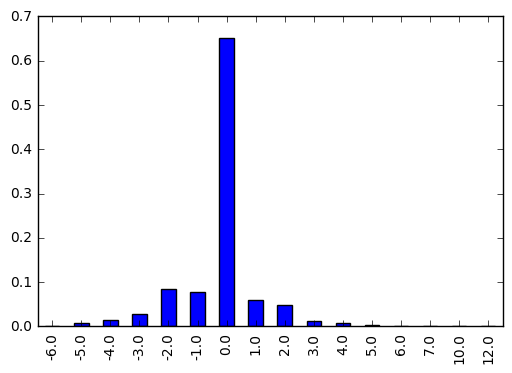

In [4]:
pmf.plot.bar()

In [5]:
pmf.mean()

0.0625

In [6]:
pmf.median()

0.00996168582375479